# 5.1.4 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기
pd.set_option('display.max_columns', None)   # 결과물로 보여주는 열 갯수 최대화
pd.set_option('display.max_rows', None)      # 결과물로 보여주는 행 갯수 최대화
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/t/dataset.csv') 
                                             # 데이터파일을 불러와서 데이터프레임(df)에 저장
df.head(3)                                   # 데이터프레임(df)를 3행까기 보여주기

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0


In [ ]:
df.shape

(91713, 85)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

# 5.1.5 ID 변수 설정

In [ ]:
df['patient_id'].dtypes

dtype('int64')

In [ ]:
df['patient_id'].isnull().sum()   # ID 변수인 id 값의 결측값 확인

0

In [ ]:
# ID 변수인 id 값의 중복 여부를 체크하기 위해 유일한(unique) 값의 개수 체크 
n = len(pd.unique(df['patient_id']))   # pd.unique는 유일한 변수값을 출력하고 len은 값의 개수를 카운트  
print(n)

91713


In [ ]:
# 숫자형태가 아닌 SERIALNO의 갯수를 세는 파이썬 코드
mask = pd.to_numeric(df['patient_id'], errors='coerce').isna()
a = mask.sum() 
print (a)  

0


# 5.1.7 타겟변수 생성

In [ ]:
df['hospital_death'].dtype

dtype('int64')

In [ ]:
df['hospital_death'].isnull().sum()

0

In [ ]:
df['hospital_death'].value_counts(dropna=False)

0    83798
1     7915
Name: hospital_death, dtype: int64

In [ ]:
df['hospital_death'].value_counts(dropna=False, normalize=True)

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64

# 5.1.7 기타 변수 데이터 처리

In [ ]:
cols = ['age', 'bmi', 'height', 'weight', 'heart_rate_apache', 'temp_apache','resprate_apache', 'map_apache',
        'd1_diasbp_max','d1_diasbp_min','d1_heartrate_max', 'd1_heartrate_min','d1_mbp_max','d1_mbp_min','d1_resprate_max',
        'd1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_max','d1_sysbp_min'] # 구간 변수를 cols에 저장
df[cols].dtypes

age                  float64
bmi                  float64
height               float64
weight               float64
heart_rate_apache    float64
temp_apache          float64
resprate_apache      float64
map_apache           float64
d1_diasbp_max        float64
d1_diasbp_min        float64
d1_heartrate_max     float64
d1_heartrate_min     float64
d1_mbp_max           float64
d1_mbp_min           float64
d1_resprate_max      float64
d1_resprate_min      float64
d1_spo2_max          float64
d1_spo2_min          float64
d1_sysbp_max         float64
d1_sysbp_min         float64
dtype: object

In [ ]:
pd.options.display.float_format = '{:.2f}'.format # 소숫점 2자리로 숫자 표기 제한
df[cols].describe()

,age,bmi,height,weight,heart_rate_apache,temp_apache,resprate_apache,map_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min
count,87485.00,88284.00,90379.00,88993.00,90835.00,87605.00,90479.00,90719.00,91548.00,91548.00,91568.00,91568.00,91493.00,91493.00,91328.00,91328.00,91380.00,91380.00,91554.00,91554.00
mean,62.31,29.19,169.64,84.03,99.71,36.41,25.81,88.02,88.49,50.16,103.00,70.32,104.65,64.87,28.88,12.85,99.24,90.45,148.34,96.92
std,16.78,8.28,10.80,25.01,30.87,0.83,15.11,42.03,19.80,13.32,22.02,17.12,20.81,15.68,10.70,5.06,1.79,10.03,25.73,20.68
min,16.00,14.84,137.20,38.60,30.00,32.10,4.00,40.00,46.00,13.00,58.00,0.00,60.00,22.00,14.00,0.00,0.00,0.00,90.00,41.00
25%,52.00,23.64,162.50,66.80,86.00,36.20,11.00,54.00,75.00,42.00,87.00,60.00,90.00,55.00,22.00,10.00,99.00,89.00,130.00,83.00
50%,65.00,27.65,170.10,80.30,104.00,36.50,28.00,67.00,86.00,50.00,101.00,69.00,102.00,64.00,26.00,13.00,100.00,92.00,146.00,96.00
75%,75.00,32.93,177.80,97.10,120.00,36.70,36.00,125.00,99.00,58.00,116.00,81.00,116.00,75.00,32.00,16.00,100.00,95.00,164.00,110.00
max,89.00,67.81,195.59,186.00,178.00,39.70,60.00,200.00,165.00,90.00,177.00,175.00,184.00,112.00,92.00,100.00,100.00,100.00,232.00,160.00


In [ ]:
c = df['age'] >18   # c는 기준(criterion)의 약자
df[c].head(3)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.00,22.73,0,Caucasian,M,180.30,Floor,92,admit,CTICU,0.54,73.90,113.00,502.01,0,0.00,3.00,6.00,0.00,4.00,118.00,0.00,40.00,36.00,39.30,0.00,68.00,37.00,68.00,37.00,119.00,72.00,89.00,46.00,89.00,46.00,34.00,10.00,100.00,74.00,131.00,73.00,131.00,73.00,39.90,37.20,68.00,63.00,68.00,63.00,119.00,108.00,86.00,85.00,86.00,85.00,26.00,18.00,100.00,74.00,131.00,115.00,131.00,115.00,168.00,109.00,4.00,3.40,0.10,0.05,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.00,27.42,0,Caucasian,F,160.00,Floor,90,admit,Med-Surg ICU,0.93,70.20,108.00,203.01,0,0.00,1.00,3.00,0.00,1.00,120.00,0.00,46.00,33.00,35.10,1.00,95.00,31.00,95.00,31.00,118.00,72.00,120.00,38.00,120.00,38.00,32.00,12.00,100.00,70.00,159.00,67.00,159.00,67.00,36.30,35.10,61.00,48.00,61.00,48.00,114.00,100.00,85.00,57.00,85.00,57.00,31.00,28.00,95.00,70.00,95.00,71.00,95.00,71.00,145.00,128.00,4.20,3.80,0.47,0.29,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.00,31.95,0,Caucasian,F,172.70,Accident & Emergency,93,admit,Med-Surg ICU,0.00,95.30,122.00,703.03,0,0.00,3.00,6.00,0.00,5.00,102.00,0.00,68.00,37.00,36.70,0.00,88.00,48.00,88.00,48.00,96.00,68.00,102.00,68.00,102.00,68.00,21.00,8.00,98.00,91.00,148.00,105.00,148.00,105.00,37.00,36.70,88.00,58.00,88.00,58.00,96.00,78.00,91.00,83.00,91.00,83.00,20.00,16.00,98.00,91.00,148.00,124.00,148.00,124.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Metabolic,Metabolic,NaN,0


In [ ]:
len(df[c])   # df[c]의 자료 개수(행 기준)

87056

In [ ]:
len(df[c]) / len(df)   # df에 대비해서 df[c]의 자료 개수(행 기준) 비율

0.9492220295923152

In [ ]:
df1 = df[c]   # 데이터프레임 df[c]를 df1에 저장
df1.shape

(87056, 85)

In [ ]:
# 범주형 변수를 cols1에 저장.
cols1 = ['gender', 'ethnicity','aids','diabetes_mellitus','cirrhosis','leukemia',
         'lymphoma','hepatic_failure','solid_tumor_with_metastasis','immunosuppression']
df1[cols1].isnull().sum()

gender                           13
ethnicity                      1336
aids                              0
diabetes_mellitus                 0
cirrhosis                         0
leukemia                          0
lymphoma                          0
hepatic_failure                   0
solid_tumor_with_metastasis       0
immunosuppression                 0
dtype: int64

In [ ]:
df1[cols1].dtypes

gender                          object
ethnicity                       object
aids                           float64
diabetes_mellitus              float64
cirrhosis                      float64
leukemia                       float64
lymphoma                       float64
hepatic_failure                float64
solid_tumor_with_metastasis    float64
immunosuppression              float64
dtype: object

# 5.1.8 결측값 50% 초과 변수 제거

In [56]:
df1[cols].isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

bmi                  True
height               True
weight               True
heart_rate_apache    True
temp_apache          True
resprate_apache      True
map_apache           True
d1_diasbp_max        True
d1_diasbp_min        True
d1_heartrate_max     True
d1_heartrate_min     True
d1_mbp_max           True
d1_mbp_min           True
d1_resprate_max      True
d1_resprate_min      True
d1_spo2_max          True
d1_spo2_min          True
d1_sysbp_max         True
d1_sysbp_min         True
dtype: bool

In [ ]:
df1[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87056 entries, 0 to 91712
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                87056 non-null  float64
 1   bmi                83827 non-null  float64
 2   height             85810 non-null  float64
 3   weight             84499 non-null  float64
 4   heart_rate_apache  86900 non-null  float64
 5   temp_apache        83848 non-null  float64
 6   resprate_apache    86562 non-null  float64
 7   map_apache         86790 non-null  float64
 8   d1_diasbp_max      86907 non-null  float64
 9   d1_diasbp_min      86907 non-null  float64
 10  d1_heartrate_max   86925 non-null  float64
 11  d1_heartrate_min   86925 non-null  float64
 12  d1_mbp_max         86856 non-null  float64
 13  d1_mbp_min         86856 non-null  float64
 14  d1_resprate_max    86695 non-null  float64
 15  d1_resprate_min    86695 non-null  float64
 16  d1_spo2_max        867

In [ ]:
df1[cols].describe()

,age,bmi,height,weight,heart_rate_apache,temp_apache,resprate_apache,map_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min
count,87056.00,83827.00,85810.00,84499.00,86900.00,83848.00,86562.00,86790.00,86907.00,86907.00,86925.00,86925.00,86856.00,86856.00,86695.00,86695.00,86752.00,86752.00,86913.00,86913.00
mean,62.53,29.38,169.86,84.77,99.77,36.42,25.69,88.20,88.54,50.37,103.09,70.42,104.67,65.02,28.85,12.79,99.25,90.50,148.29,96.99
std,16.52,8.31,10.75,25.07,30.80,0.84,15.12,41.99,19.70,13.32,21.99,17.08,20.74,15.67,10.70,5.03,1.76,9.93,25.66,20.62
min,19.00,14.84,137.20,38.60,30.00,32.10,4.00,40.00,46.00,13.00,58.00,0.00,60.00,22.00,14.00,0.00,0.00,0.00,90.00,41.00
25%,53.00,23.79,162.60,67.70,86.00,36.20,11.00,54.00,75.00,42.00,87.00,60.00,90.00,55.00,22.00,10.00,99.00,89.00,130.00,84.00
50%,65.00,27.88,170.18,81.20,104.00,36.50,28.00,67.00,87.00,50.00,101.00,70.00,102.00,64.00,26.00,13.00,100.00,92.00,146.00,96.00
75%,75.00,33.16,177.80,97.90,120.00,36.70,36.00,125.00,99.00,58.00,117.00,81.00,116.00,75.00,32.00,16.00,100.00,95.00,164.00,110.00
max,89.00,67.81,195.59,186.00,178.00,39.70,60.00,200.00,165.00,90.00,177.00,175.00,184.00,112.00,92.00,96.00,100.00,100.00,232.00,160.00


In [ ]:
# bmi의 결측값 비율 확인
df['bmi'].isnull().mean()

0.03738837460338229

In [ ]:
# age의 결측값 비율 확인
df['age'].isnull().mean()

0.04610033473989511

# 5.1.9 요약통계 및 도수분포표 점검

In [ ]:
cols = ['age', 'bmi', 'height', 'weight', 'heart_rate_apache', 'temp_apache','resprate_apache', 'map_apache', 
        'd1_diasbp_max','d1_diasbp_min','d1_heartrate_max', 'd1_heartrate_min','d1_mbp_max','d1_mbp_min','d1_resprate_max',
        'd1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_max','d1_sysbp_min']  # 구간 변수를 cols에 저장 
df[cols].describe()                     # 구간(interval) 변수의 요약통계 구하기

,age,bmi,height,weight,heart_rate_apache,temp_apache,resprate_apache,map_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min
count,87485.00,88284.00,90379.00,88993.00,90835.00,87605.00,90479.00,90719.00,91548.00,91548.00,91568.00,91568.00,91493.00,91493.00,91328.00,91328.00,91380.00,91380.00,91554.00,91554.00
mean,62.31,29.19,169.64,84.03,99.71,36.41,25.81,88.02,88.49,50.16,103.00,70.32,104.65,64.87,28.88,12.85,99.24,90.45,148.34,96.92
std,16.78,8.28,10.80,25.01,30.87,0.83,15.11,42.03,19.80,13.32,22.02,17.12,20.81,15.68,10.70,5.06,1.79,10.03,25.73,20.68
min,16.00,14.84,137.20,38.60,30.00,32.10,4.00,40.00,46.00,13.00,58.00,0.00,60.00,22.00,14.00,0.00,0.00,0.00,90.00,41.00
25%,52.00,23.64,162.50,66.80,86.00,36.20,11.00,54.00,75.00,42.00,87.00,60.00,90.00,55.00,22.00,10.00,99.00,89.00,130.00,83.00
50%,65.00,27.65,170.10,80.30,104.00,36.50,28.00,67.00,86.00,50.00,101.00,69.00,102.00,64.00,26.00,13.00,100.00,92.00,146.00,96.00
75%,75.00,32.93,177.80,97.10,120.00,36.70,36.00,125.00,99.00,58.00,116.00,81.00,116.00,75.00,32.00,16.00,100.00,95.00,164.00,110.00
max,89.00,67.81,195.59,186.00,178.00,39.70,60.00,200.00,165.00,90.00,177.00,175.00,184.00,112.00,92.00,100.00,100.00,100.00,232.00,160.00


In [ ]:
df1[cols].skew()

age                  -0.60
bmi                   1.42
height               -0.11
weight                1.06
heart_rate_apache    -0.27
temp_apache          -0.96
resprate_apache       0.27
map_apache            0.69
d1_diasbp_max         0.81
d1_diasbp_min         0.08
d1_heartrate_max      0.57
d1_heartrate_min     -0.10
d1_mbp_max            0.80
d1_mbp_min            0.20
d1_resprate_max       2.50
d1_resprate_min       0.11
d1_spo2_max         -18.96
d1_spo2_min          -4.81
d1_sysbp_max          0.51
d1_sysbp_min          0.22
dtype: float64

In [ ]:
df1[cols].kurtosis()

age                  -0.25
bmi                   3.33
height               -0.38
weight                1.81
heart_rate_apache    -0.44
temp_apache           8.99
resprate_apache      -0.93
map_apache           -0.79
d1_diasbp_max         1.26
d1_diasbp_min         0.32
d1_heartrate_max      0.34
d1_heartrate_min      1.78
d1_mbp_max            1.12
d1_mbp_min            0.36
d1_resprate_max       9.57
d1_resprate_min       3.35
d1_spo2_max         868.30
d1_spo2_min          32.23
d1_sysbp_max          0.27
d1_sysbp_min          0.31
dtype: float64

In [ ]:
df1['ethnicity'].value_counts(dropna=False)

Caucasian           66869
African American     9221
Other/Unknown        4214
Hispanic             3554
NaN                  1336
Asian                1091
Native American       771
Name: ethnicity, dtype: int64

In [ ]:
pd.crosstab(df1['ethnicity'], columns='count') # frequency table 생성(개수 기준)

col_0,count
ethnicity,
African American,9221
Asian,1091
Caucasian,66869
Hispanic,3554
Native American,771
Other/Unknown,4214


In [ ]:
pd.crosstab(df1['ethnicity'], columns='ratio', normalize=True)   # frequency table 생성(비율 기준).

col_0,ratio
ethnicity,
African American,0.11
Asian,0.01
Caucasian,0.78
Hispanic,0.04
Native American,0.01
Other/Unknown,0.05


In [ ]:
pd.crosstab(df1['ethnicity'], df1['hospital_death'])   # frequency table 생성(개수 기준)

hospital_death,0,1
ethnicity,,
African American,8515,706
Asian,1003,88
Caucasian,61234,5635
Hispanic,3218,336
Native American,702,69
Other/Unknown,3883,331


In [ ]:
cross_tab1=pd.crosstab([df1['ethnicity'], df1['aids']],df1['hospital_death'], normalize=True)   # frequency table 생성(비율 기준)
cross_tab1

hospital_death           0    1
ethnicity        aids          
African American 0.00 0.10 0.01
                 1.00 0.00 0.00
Asian            0.00 0.01 0.00
Caucasian        0.00 0.71 0.07
                 1.00 0.00 0.00
Hispanic         0.00 0.04 0.00
                 1.00 0.00 0.00
Native American  0.00 0.01 0.00
                 1.00 0.00 0.00
Other/Unknown    0.00 0.05 0.00
                 1.00 0.00 0.00

In [ ]:
cross_tab2=pd.crosstab([df1['ethnicity'], df1['lymphoma']],df1['hospital_death'], normalize=True)   # frequency table 생성(비율 기준)
cross_tab2

hospital_death               0    1
ethnicity        lymphoma          
African American 0.00     0.10 0.01
                 1.00     0.00 0.00
Asian            0.00     0.01 0.00
                 1.00     0.00 0.00
Caucasian        0.00     0.71 0.07
                 1.00     0.00 0.00
Hispanic         0.00     0.04 0.00
                 1.00     0.00 0.00
Native American  0.00     0.01 0.00
                 1.00     0.00 0.00
Other/Unknown    0.00     0.05 0.00
                 1.00     0.00 0.00

In [ ]:
cross_tab3=pd.crosstab([df1['ethnicity'], df1['leukemia']],df1['hospital_death'], normalize=True)   # frequency table 생성(비율 기준)
cross_tab3

hospital_death               0    1
ethnicity        leukemia          
African American 0.00     0.10 0.01
                 1.00     0.00 0.00
Asian            0.00     0.01 0.00
                 1.00     0.00 0.00
Caucasian        0.00     0.71 0.06
                 1.00     0.00 0.00
Hispanic         0.00     0.04 0.00
                 1.00     0.00 0.00
Native American  0.00     0.01 0.00
                 1.00     0.00 0.00
Other/Unknown    0.00     0.05 0.00
                 1.00     0.00 0.00

In [ ]:
cross_tab4=pd.crosstab([df1['ethnicity'], df1['diabetes_mellitus']],df1['hospital_death'], normalize=True)   # frequency table 생성(비율 기준)
cross_tab4

hospital_death                        0    1
ethnicity        diabetes_mellitus          
African American 0.00              0.07 0.01
                 1.00              0.03 0.00
Asian            0.00              0.01 0.00
                 1.00              0.00 0.00
Caucasian        0.00              0.56 0.05
                 1.00              0.16 0.01
Hispanic         0.00              0.03 0.00
                 1.00              0.01 0.00
Native American  0.00              0.01 0.00
                 1.00              0.00 0.00
Other/Unknown    0.00              0.03 0.00
                 1.00              0.01 0.00

In [ ]:
cross_tab5=pd.crosstab([df1['ethnicity'], df1['cirrhosis']],df1['hospital_death'], normalize=True)
cross_tab5

hospital_death                0    1
ethnicity        cirrhosis          
African American 0.00      0.10 0.01
                 1.00      0.00 0.00
Asian            0.00      0.01 0.00
                 1.00      0.00 0.00
Caucasian        0.00      0.70 0.06
                 1.00      0.01 0.00
Hispanic         0.00      0.04 0.00
                 1.00      0.00 0.00
Native American  0.00      0.01 0.00
                 1.00      0.00 0.00
Other/Unknown    0.00      0.04 0.00
                 1.00      0.00 0.00

In [ ]:
cross_tab6=pd.crosstab([df1['ethnicity'], df1['hepatic_failure']],df1['hospital_death'], normalize=True)
cross_tab6

hospital_death                      0    1
ethnicity        hepatic_failure          
African American 0.00            0.10 0.01
                 1.00            0.00 0.00
Asian            0.00            0.01 0.00
                 1.00            0.00 0.00
Caucasian        0.00            0.71 0.06
                 1.00            0.01 0.00
Hispanic         0.00            0.04 0.00
                 1.00            0.00 0.00
Native American  0.00            0.01 0.00
                 1.00            0.00 0.00
Other/Unknown    0.00            0.04 0.00
                 1.00            0.00 0.00

In [ ]:
cross_tab7=pd.crosstab([df1['ethnicity'], df1['immunosuppression']],df1['hospital_death'], normalize=True)
cross_tab7

hospital_death                        0    1
ethnicity        immunosuppression          
African American 0.00              0.10 0.01
                 1.00              0.00 0.00
Asian            0.00              0.01 0.00
                 1.00              0.00 0.00
Caucasian        0.00              0.70 0.06
                 1.00              0.02 0.00
Hispanic         0.00              0.04 0.00
                 1.00              0.00 0.00
Native American  0.00              0.01 0.00
                 1.00              0.00 0.00
Other/Unknown    0.00              0.04 0.00
                 1.00              0.00 0.00

In [ ]:
cross_tab8=pd.crosstab([df1['ethnicity'], df1['solid_tumor_with_metastasis']],df1['hospital_death'], normalize=True)
cross_tab8

hospital_death                                  0    1
ethnicity        solid_tumor_with_metastasis          
African American 0.00                        0.10 0.01
                 1.00                        0.00 0.00
Asian            0.00                        0.01 0.00
                 1.00                        0.00 0.00
Caucasian        0.00                        0.70 0.06
                 1.00                        0.01 0.00
Hispanic         0.00                        0.04 0.00
                 1.00                        0.00 0.00
Native American  0.00                        0.01 0.00
                 1.00                        0.00 0.00
Other/Unknown    0.00                        0.04 0.00
                 1.00                        0.00 0.00

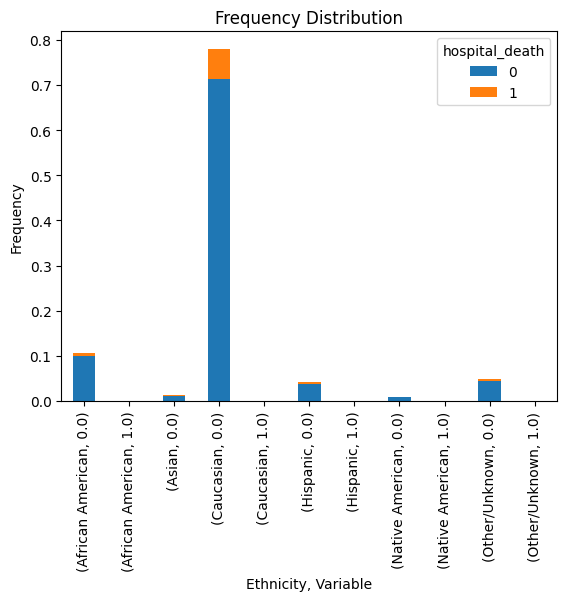

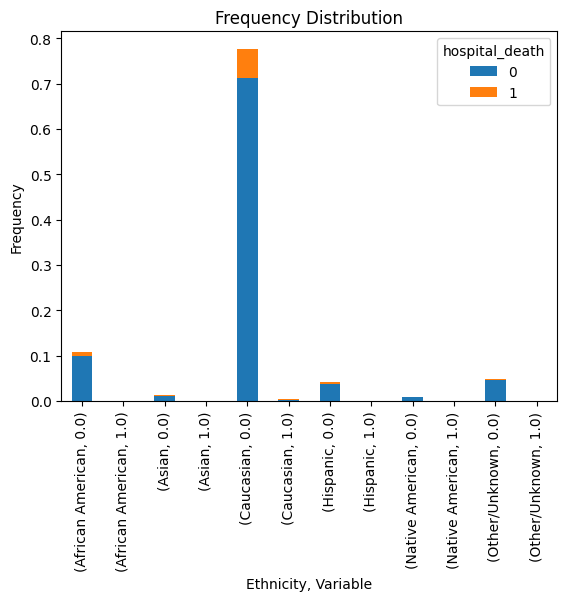

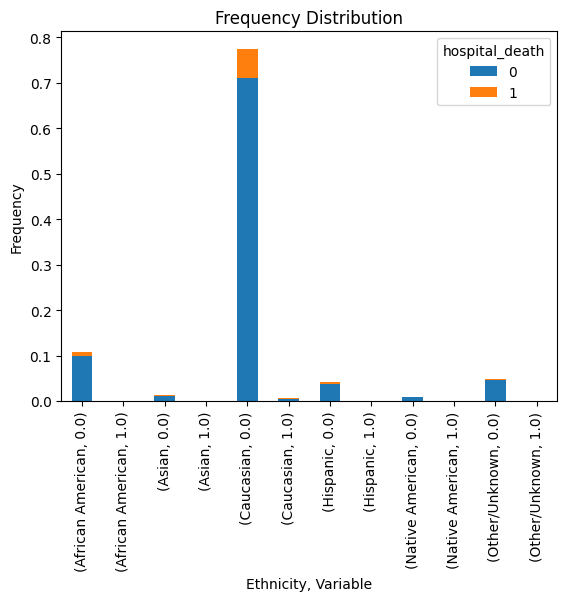

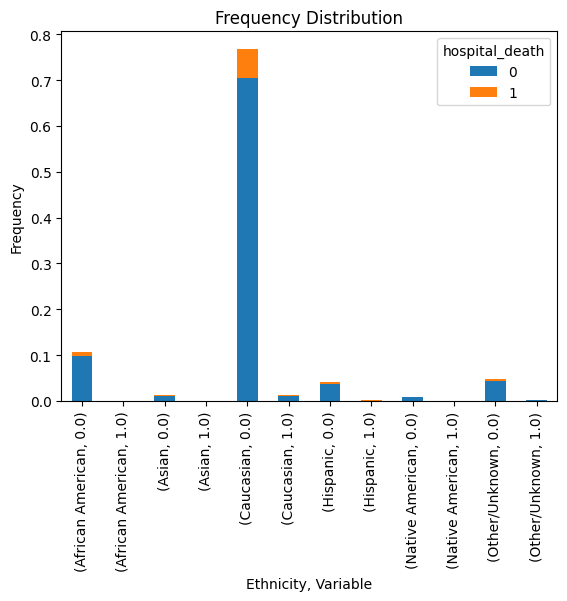

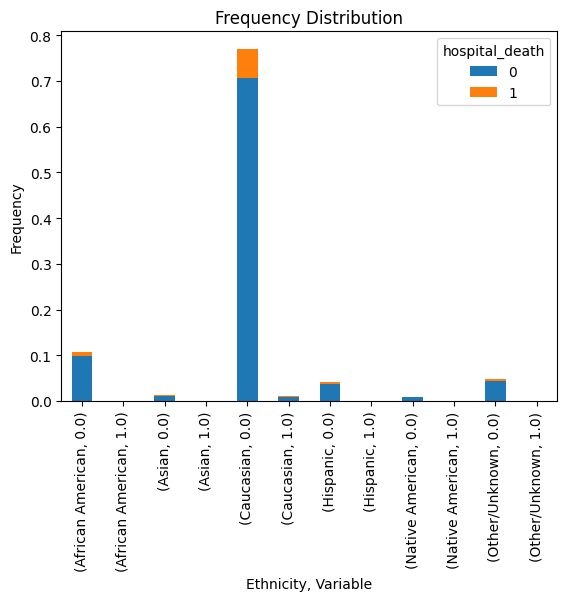

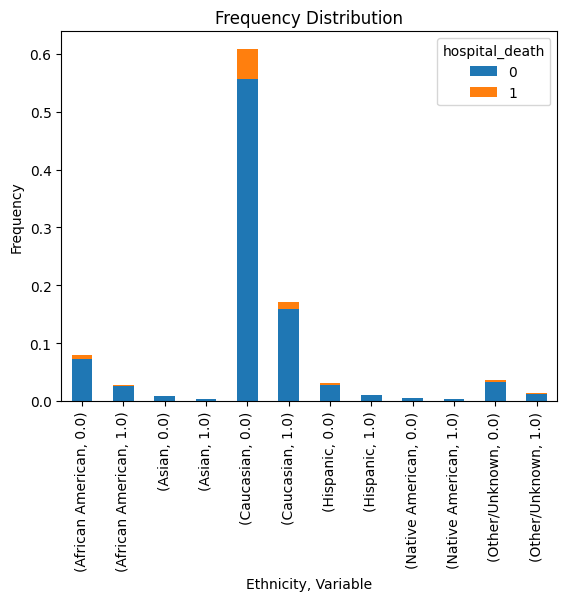

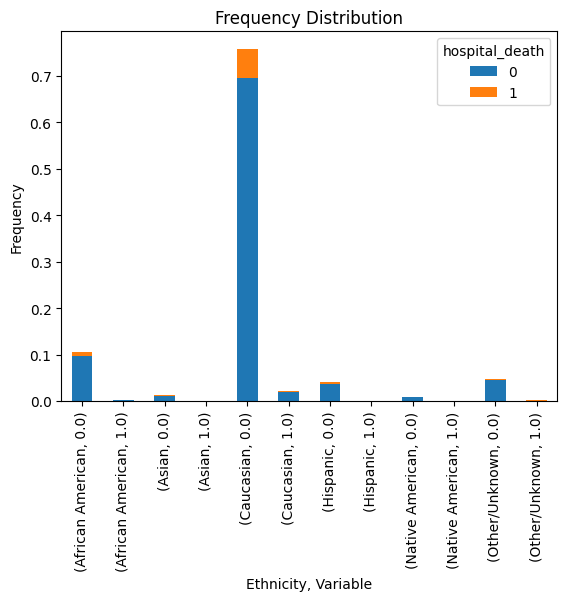

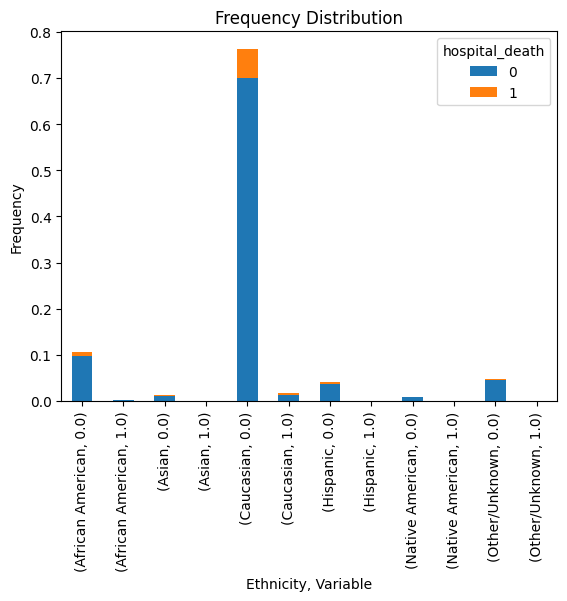

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 도수분포표 생성 및 막대 그래프 그리기 함수 정의
def plot_bar_chart(cross_tab):
    cross_tab.plot(kind='bar', stacked=True)
    plt.title('Frequency Distribution')
    plt.xlabel('Ethnicity, Variable')
    plt.ylabel('Frequency')
    plt.show()

plot_bar_chart(cross_tab1)
plot_bar_chart(cross_tab2)
plot_bar_chart(cross_tab3)
plot_bar_chart(cross_tab5)
plot_bar_chart(cross_tab6)
plot_bar_chart(cross_tab4)
plot_bar_chart(cross_tab7)
plot_bar_chart(cross_tab8)

# 5.1.10 이상값 제거

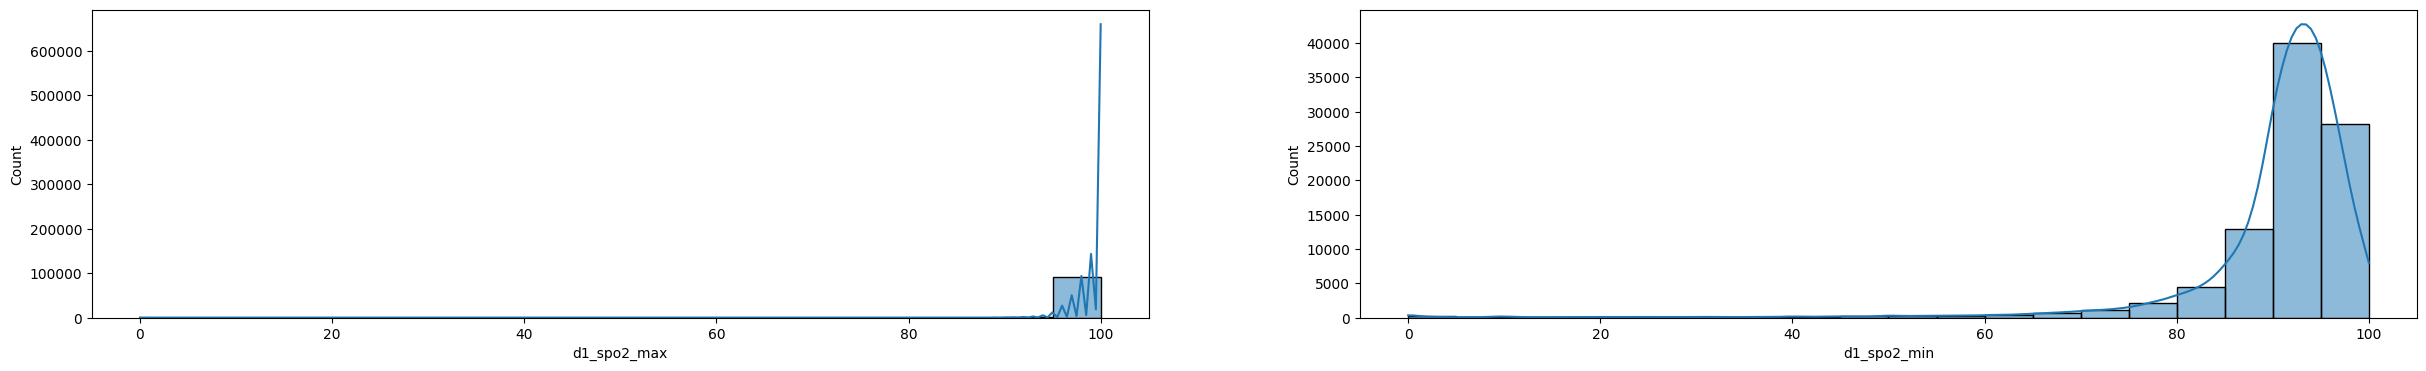

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(30, 4))

sns.histplot(ax=axes[0], data=df, x="d1_spo2_max", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x="d1_spo2_min", kde=True, bins=20);
plt.show(); 

<Axes: xlabel='d1_spo2_min'>

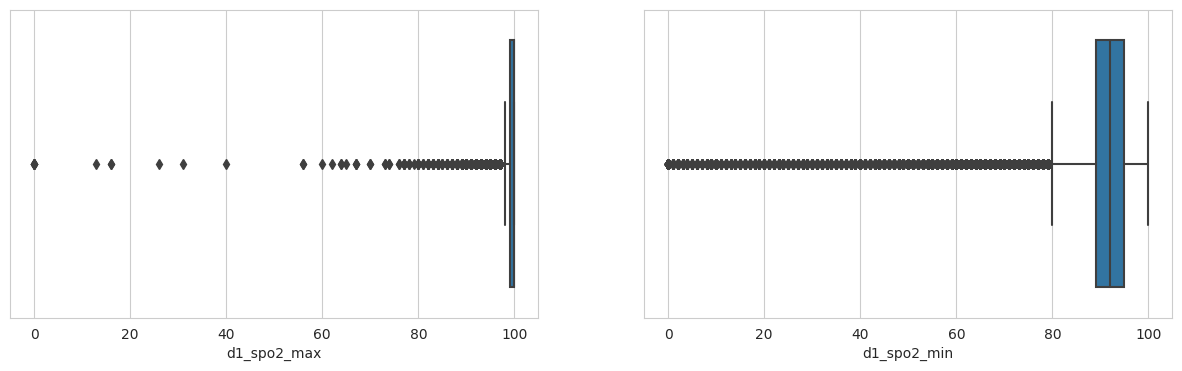

In [ ]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(ax=axes[0], x = 'd1_spo2_max', data = df1) 
sns.boxplot(ax=axes[1], x = 'd1_spo2_min', data = df1) 

In [ ]:
Q1 = df1[['d1_spo2_max','d1_spo2_min']].quantile(0.25)
Q3 = df1[['d1_spo2_max','d1_spo2_min']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

d1_spo2_max   1.00
d1_spo2_min   6.00
dtype: float64


In [ ]:
Lower = Q1-3.0*IQR
Upper = Q3+3.0*IQR
print(Lower)

d1_spo2_max   96.00
d1_spo2_min   71.00
dtype: float64


In [ ]:
print(Upper)

d1_spo2_max   103.00
d1_spo2_min   113.00
dtype: float64


In [50]:
c1 = df1['d1_spo2_max'] >= 96
c2 = df1['d1_spo2_min'] >= 71

df2 = df1[c1 & c2]
df2.shape

(82122, 85)

# 5.1.11 상관관계 검토

In [51]:
cols = ['age', 'bmi', 'height', 'weight', 'heart_rate_apache', 'temp_apache','resprate_apache', 'map_apache', 
        'd1_diasbp_max','d1_diasbp_min','d1_heartrate_max', 'd1_heartrate_min','d1_mbp_max','d1_mbp_min','d1_resprate_max',
        'd1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_max','d1_sysbp_min'] # 구간 변수를 cols에 저장
round(df2[cols].corr(), 2)               # 구간 변수간 상관계수 디스플레이

,age,bmi,height,weight,heart_rate_apache,temp_apache,resprate_apache,map_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min
age,1.00,-0.09,-0.11,-0.13,-0.15,-0.08,0.03,-0.02,-0.07,-0.22,-0.14,-0.15,0.00,-0.14,0.03,0.04,-0.04,-0.12,0.11,-0.06
bmi,-0.09,1.00,-0.07,0.88,-0.02,0.03,0.01,0.05,0.06,-0.02,-0.03,0.01,0.07,0.01,0.01,-0.01,-0.10,-0.07,0.09,0.05
height,-0.11,-0.07,1.00,0.39,-0.03,0.01,-0.05,0.03,0.04,0.13,-0.02,-0.04,0.03,0.09,-0.02,-0.06,-0.04,-0.01,-0.00,0.05
weight,-0.13,0.88,0.39,1.00,-0.03,0.04,-0.02,0.07,0.07,0.04,-0.04,-0.00,0.08,0.05,0.00,-0.03,-0.11,-0.07,0.08,0.07
heart_rate_apache,-0.15,-0.02,-0.03,-0.03,1.00,0.11,0.19,0.03,0.11,0.01,0.81,0.60,0.05,-0.06,0.16,0.12,0.04,-0.10,-0.03,-0.13
temp_apache,-0.08,0.03,0.01,0.04,0.11,1.00,0.05,-0.02,0.00,0.07,0.08,0.18,-0.00,0.07,0.02,0.10,-0.08,0.02,0.00,0.08
resprate_apache,0.03,0.01,-0.05,-0.02,0.19,0.05,1.00,0.11,0.02,0.06,0.17,0.15,0.13,0.12,0.57,0.32,-0.06,-0.08,0.05,0.02
map_apache,-0.02,0.05,0.03,0.07,0.03,-0.02,0.11,1.00,0.44,0.36,0.01,-0.02,0.55,0.42,0.06,0.02,-0.05,0.03,0.48,0.37
d1_diasbp_max,-0.07,0.06,0.04,0.07,0.11,0.00,0.02,0.44,1.00,0.15,0.18,-0.03,0.82,0.13,0.10,-0.06,0.04,-0.13,0.60,0.10
d1_diasbp_min,-0.22,-0.02,0.13,0.04,0.01,0.07,0.06,0.36,0.15,1.00,-0.09,0.12,0.23,0.85,-0.08,0.12,-0.17,0.23,0.15,0.66


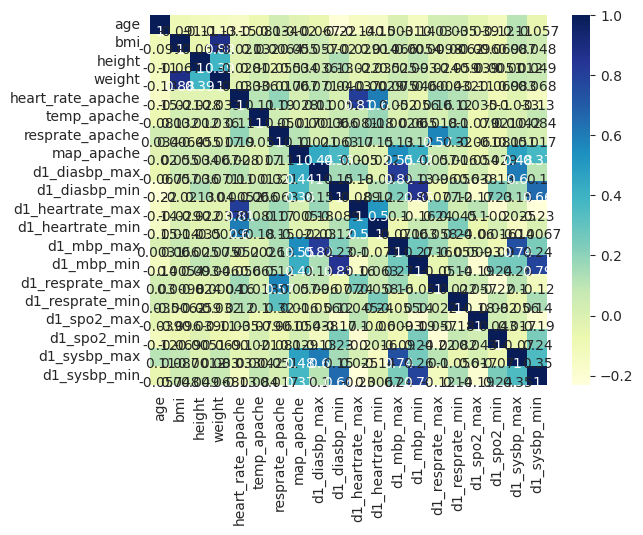

In [52]:
# 추가 코딩
import seaborn as sns

corr = df2[cols].corr()  
annot_kws = {"ha": 'center',"va": 'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu");

In [ ]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset-2.csv', index=False) 

# 5.1.12 t-검정

In [53]:
from scipy import stats

data_1 = df2[df2['hospital_death'] == 1]['d1_spo2_max']
data_0 = df2[df2['hospital_death'] == 0]['d1_spo2_max']

stats.ttest_ind(data_1, data_0)    #pvalue의 값이 0.05보다 크므로 귀무가설을 기각할수 없다.

Ttest_indResult(statistic=14.931210862032934, pvalue=2.404723633065672e-50)

In [54]:
from scipy import stats

data_1 = df2[df2['hospital_death'] == 1]['d1_spo2_min']
data_0 = df2[df2['hospital_death'] == 0]['d1_spo2_min']

stats.ttest_ind(data_1, data_0)   #pvalue의 값이 0.05보다작으므로 귀무가설을 기각할수 있다.

Ttest_indResult(statistic=-33.762843308076135, pvalue=3.514354912089527e-248)

In [55]:
from scipy import stats

data_1 = df2[df2['hospital_death'] == 1]['age']
data_0 = df2[df2['hospital_death'] == 0]['age']

stats.ttest_ind(data_1, data_0) 

Ttest_indResult(statistic=29.588601261278107, pvalue=2.136171768857608e-191)